In [1]:
!git clone https://github.com/bjornstenger/xml2yolo.git

Cloning into 'xml2yolo'...


In [2]:
!git clone https://github.com/Taeyoung96/Yolo-to-COCO-format-converter.git 

Cloning into 'Yolo-to-COCO-format-converter'...


In [3]:
!git clone https://github.com/ManzarIMalik/YOLO-Annotation-Tool.git

Cloning into 'YOLO-Annotation-Tool'...


In [5]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...


In [6]:
!python yolov5/train.py  --weights yolov5n.pt --epochs 1

train: weights=yolov5n.pt, cfg=, data=yolov5\data\coco128.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-295-gac6c4383 Python-3.10.9 torch-2.2.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

In [7]:
!python yolov5/train.py  --weights yolov5n.pt --epochs 1

train: weights=yolov5n.pt, cfg=, data=yolov5\data\coco128.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-295-gac6c4383 Python-3.10.9 torch-2.2.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

In [8]:
# библеотека с предобученной моделью
import easyocr
# загружаем предобученную модель на английских буквам
reader = easyocr.Reader(['en', 'ru'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [11]:
import os
# удаляем файлы в формате xml
# в dir_name указываем путь к нашей такой же папке
dir_name = "C:/mok/datasets/coco128/labels"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".xml"):
        os.remove(os.path.join(dir_name, item))

In [12]:
%cd C:/mok/YOLO-Annotation-Tool

C:\mok\YOLO-Annotation-Tool


c:\mok\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [13]:
%cd C:/mok/YOLO-Annotation-Tool
!Annotate.html
%cd C:/mok/datasets/coco128/labels

C:\mok\YOLO-Annotation-Tool


c:\mok\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\mok\datasets\coco128\labels


In [14]:
import os
# забираем данные картинок путь указываем наш
images = [os.path.join('C:/mok/datasets/coco128/images', x) for x in os.listdir('C:/mok/datasets/coco128/images')]
# Так как для загрузки в нашу модель данные разметки должны быть в отдельных файлах мы дублируем их из папки с ними, для дальнейшей разбивки на тестовые, обучающие и валидационные.
labels = [os.path.join('C:/mok/datasets/coco128/labels', x) for x in os.listdir('C:/mok/datasets/coco128/labels')]

In [15]:
from sklearn.model_selection import train_test_split 
# производим разделение всех наших данных на Тренировочные и валидационные
train_images, val_images, train_annotations, val_annotations = train_test_split(images, labels, test_size=0.15, random_state=42)
# валидационные данные делим на тестовые и валидационные, чтобы одни использовать для тестирования пока обучается, а вторые для тестирования после обучения
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size=0.5, random_state=42)

In [16]:
import os
# Создаем папки куда будем переносить наши разбитые на 3 набора данные фотографий
parent = 'C:/mok/new'
dirs = 'images/train', 'images/val', 'images/test', 'labels/train', 'labels/val', 'labels/test'
for dir in dirs:
    path = os.path.join(parent, dir)
    # проверяем существование папки чтобы не создавать если уже есть
    if not os.path.exists(path):
        # создаем папку
        os.makedirs(path)

In [17]:
import shutil
#Утилитная функция для переноса файлов 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

# Переносим файлы по из папкам учитывая разделение
move_files_to_folder(train_images, 'C:/mok/new/images/train')
move_files_to_folder(val_images, 'C:/mok/new/images/val')
move_files_to_folder(test_images, 'C:/mok/new/images/test')
move_files_to_folder(train_annotations, 'C:/mok/new/labels/train')
move_files_to_folder(val_annotations, 'C:/mok/new/labels/val')
move_files_to_folder(test_annotations, 'C:/mok/new/labels/test')

In [18]:
import os
# Создаем папки куда будем переносить наши данные, чтобы модель их видела и обучалась на них
parent = 'C:/mok/yolov5'#dataset
dirs = 'dataset/annatations', 'dataset/train/images', 'dataset/train/labels'
for dir in dirs:
    path = os.path.join(parent, dir)
    # проверяем существование папки чтобы не создавать если уже есть
    if not os.path.exists(path):
        # создаем папку
        os.makedirs(path)

In [19]:
# функция для копирования папок
from distutils.dir_util import copy_tree
# копируем разметку
copy_tree('C:/mok/new/labels', 'C:/mok/yolov5/dataset/train/labels')
# копируем фотографии
copy_tree('C:/mok/new/images', 'C:/mok/yolov5/dataset/train/images')

['C:/mok/yolov5/dataset/train/images\\test\\Cars0.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars111.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars125.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars128.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars163.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars17.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars18.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars182.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars202.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars211.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars237.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars25.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars256.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars277.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars281.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars300.png',
 'C:/mok/yolov5/dataset/train/images\\test\\Cars320.png',
 'C:/mok/yolov5/dat

In [20]:
!python C:/mok/yolov5/train.py --batch 6 --epochs 3 --data C:/mok/yolov5/dataset/d.yaml  --weights C:/mok/yolov5n.pt 

train: weights=C:/mok/yolov5n.pt, cfg=, data=C:/mok/yolov5/dataset/d.yaml, hyp=..\..\..\yolov5\data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=6, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=..\..\..\yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=..\..\..\yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-295-gac6c4383 Python-3.10.9 torch-2.2.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

In [23]:
from yolov5.detect import run
run(weights='C:/mok/yolov5/runs/train/exp/weights/best.pt',source= "C:/mok/new/images/test")

YOLOv5  v7.0-295-gac6c4383 Python-3.10.9 torch-2.2.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
image 1/33 C:\mok\new\images\test\Cars0.png: 352x640 (no detections), 49.2ms
image 2/33 C:\mok\new\images\test\Cars111.png: 384x640 2 cars, 1 bus, 49.7ms
image 3/33 C:\mok\new\images\test\Cars125.png: 416x640 4 persons, 6 cars, 2 trucks, 1 bottle, 3 chairs, 48.1ms
image 4/33 C:\mok\new\images\test\Cars128.png: 384x640 (no detections), 43.9ms
image 5/33 C:\mok\new\images\test\Cars163.png: 384x640 3 cars, 47.0ms
image 6/33 C:\mok\new\images\test\Cars17.png: 448x640 2 cars, 1 truck, 44.9ms
image 7/33 C:\mok\new\images\test\Cars18.png: 512x640 2 cars, 1 truck, 57.6ms
image 8/33 C:\mok\new\images\test\Cars182.png: 384x640 1 truck, 37.9ms
image 9/33 C:\mok\new\images\test\Cars202.png: 480x640 1 car, 50.0ms
image 10/33 C:\mok\new\images\test\Cars211.png: 480x640 (no detections), 44.6ms
image 11/33 C:\mok\new\images\test\Cars237.png: 640x512 1 p

In [45]:
# библеотека с предобученной моделью
import easyocr
# загружаем предобученную модель на английских буквам
reader = easyocr.Reader(['en'], gpu = False)
# загружаем в модель фотографию и сохраняем результат
# _, text, __ = reader.readtext('yolov5/runs/detect/exp/crops/bus/bus.jpg')[0]
_, text, __ = reader.readtext('C:/123/777.png')[0]
print(text)

Using CPU. Note: This module is much faster with a GPU.


TIAS


## Модуль Б

Using CPU. Note: This module is much faster with a GPU.


oOoooo


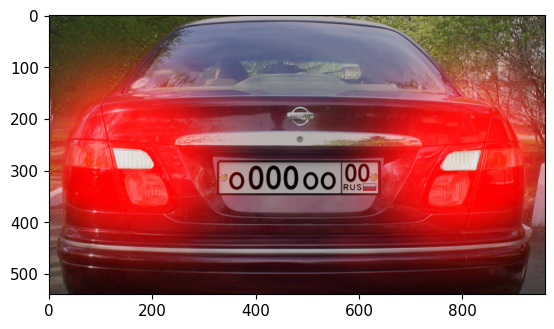

In [50]:
# библеотека с предобученной моделью
import easyocr
# загружаем предобученную модель на английских буквам
reader = easyocr.Reader(['en'], gpu = False)
# загружаем в модель фотографию и сохраняем результат
_, text, __ = reader.readtext('C:/123/14230491.jpg')[0]
print(text)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/123/14230491.jpg')
imgplot = plt.imshow(img)
plt.show()

Анализ тест - кейса

In [38]:
#Интерфейс для взаимодействия с сетью
import io
import os
import PySimpleGUI as sg
from PIL import Image
import easyocr# библеотека с предобученной моделью

filename = sg.popup_get_file('Укажи файл, в по которому будем определять автомобильный номер')
f = open('C:/noy/1.txt','w')
f.write(filename)
#f.read()

# загружаем предобученную модель на английских буквам
reader = easyocr.Reader(['en'], gpu = False)
# загружаем в модель фотографию и сохраняем результат
# _, text, __ = reader.readtext('yolov5/runs/detect/exp/crops/bus/bus.jpg')[0]
_, text, __ = reader.readtext(filename)[0]
print(text)



image = Image.open(filename)
image.thumbnail((200, 200))
bio = io.BytesIO()
image.save(bio, format="PNG")
layout = [  [sg.Text(text)],
            [sg.Image(filename)],    
            [sg.Button('Закрыть')] ]

window = sg.Window('Window Title', layout)  
event, values = window.read()   
               
window.close()  

Using CPU. Note: This module is much faster with a GPU.


DL8cX 4850


In [25]:
!cd C:/mok/yolov5/